### 선형회귀를 사용해 보스턴 집값 예측하기!
* 사이킷런 내장 데이터 셋과 선형회귀를 활용해 보스턴 집값을 예측해 봅니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston_data = load_boston()
print(boston_data.feature_names) #데이터의 column이 반환된다.
print(boston_data.data)#데이터의 값들이 반환된다.

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [3]:
boston_df = pd.DataFrame(boston_data.data,columns = boston_data.feature_names)
#Conver sklearn.bunch type data to Pandas DataFrame

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 각 column은 무엇을 의미하는지 확인해볼 필요가 있다.
변수명|속성|변수 설명
|----|----|---------------------|
crim|수치형(numeric)|타운별 1인당 범죄율
zn|수치형(numeric)|25,000평방피트를 초과하는 거주지역 비율
indus|수치형(numeric)|비소매 사업지역의 토지 비율
chas|범주형(integer)|찰스강 더비 변수 (강의 경계에 위치 = 1, 아니면 = 0)
nox|수치형(numeric)|10ppm당 농축 일산화질소
rm|수치형(numeric)|주택 1가구등 방의 평균 개수
age|수치형(numeric)|1940년 이전에 건축된 소유자 주택 비율
dis|수치형(numeric)|5개의 보스턴 고용센터까지의 접근성 지수
rad|범주형(integer)|방사형 도로까지의 접근성 지수
tax|수치형(numeric)|10,000달러당 재산세율
ptratio|수치형(numeric)|타운별 학생/교사 비율
black|수치형(numeric)|타운별 흑인의 비율
lstat|수치형(numeric)|모집단의 하위계층의 비율
medv(목표변수)|수치형(numeric)|본인 소유의 주택가격(중앙값)


In [6]:
print(boston_df.info())
#결측 값이 존재하지 않고 전부 실수 형 데이터이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 데이터 스케일링
* 위의 데이터를 살펴보면 값의 크기에서 큰 차이가 발생하는 것을 확인 할 수 있다.
* TAX의 최대값은 711이고 NOX의 최대값은 0.87에 불과하다.
* 범주형 데이터인 CHAS 와 RAD를 제외하고 피쳐 스케일링을 진행한다.

In [8]:
numeric_boston = boston_df.drop(['CHAS'],axis=1)
numeric_boston #범주형 데이터 컬럼을 삭제한다.

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
numeric_boston = (numeric_boston - numeric_boston.mean()) / numeric_boston.std()
numeric_boston

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


### 피쳐 스케일링을 진행한 값을 통해 선형회귀를 진행해보자
* 가설함수를 세우고 최소화를 진행해 선형회귀를 실시해보자

In [10]:
def cost(theta, X, y,costs):
    h = np.dot(X,theta[:-1]) + theta[-1]
    cost = np.mean((y - h) ** 2)
    costs.append(cost)
    return cost

In [11]:
from scipy.optimize import minimize
X = numeric_boston.to_numpy() # variables
y = boston_data.target # target value
m = len(numeric_boston.columns) #num of features
theta = np.zeros((m + 1, 1)) #intercept term을 추가한 theta를 생성한다.
costs = []
#sicpy에 존재하는 내장함수로 최적화를 진행한다.
res = minimize(cost,theta,(X,y,costs),options={'maxiter': 2000})

In [12]:
print(res.x) #최적화한 세타값이 도출됐다.
print(res.fun)

[-0.97317614  1.09737277  0.27654529 -2.01244791  2.70542368  0.07836669
 -3.1277581   2.85869928 -2.3183707  -2.14537482  0.88934947 -3.81444739
 22.53280842]
22.327578923315574


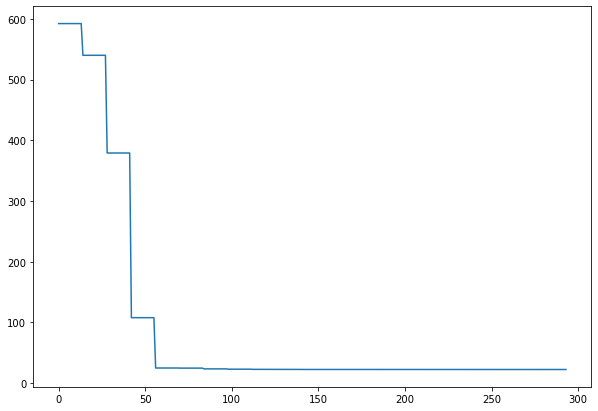

In [13]:
plt.figure(figsize = (10,7))
plt.plot(costs)

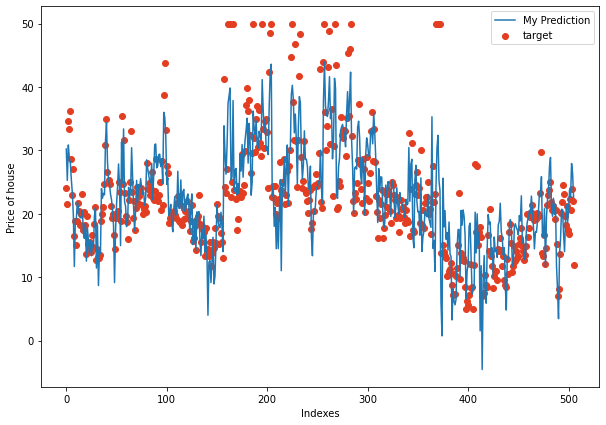

In [14]:
h = np.dot(numeric_boston,res.x[:-1]) + res.x[-1]
plt.figure(figsize=(10,7))
plt.plot(h,label = "My Prediction")
plt.xlabel('Indexes')
plt.ylabel('Price of house')
plt.scatter(np.arange(X.shape[0]),y,label = "target",color = '#E43E22')
plt.legend()

* 오차가 생각보다 안줄어드는데 그냥 파이썬으로 경사하강법을 사용해보자

In [15]:
def gradient(theta_,X_,y,learning_rate = 0.001,epoch = 10):
    cost = []
    X_ = np.hstack([X_,np.ones((len(y),1))])
    for _ in range(epoch):
        h = X_.dot(theta_)
        cost.append(((h - y) ** 2).mean())
        for t in range(len(theta_)):  
            theta_[t] = theta_[t] - learning_rate * np.mean((h - y).dot(X_[::,t]))
    return cost

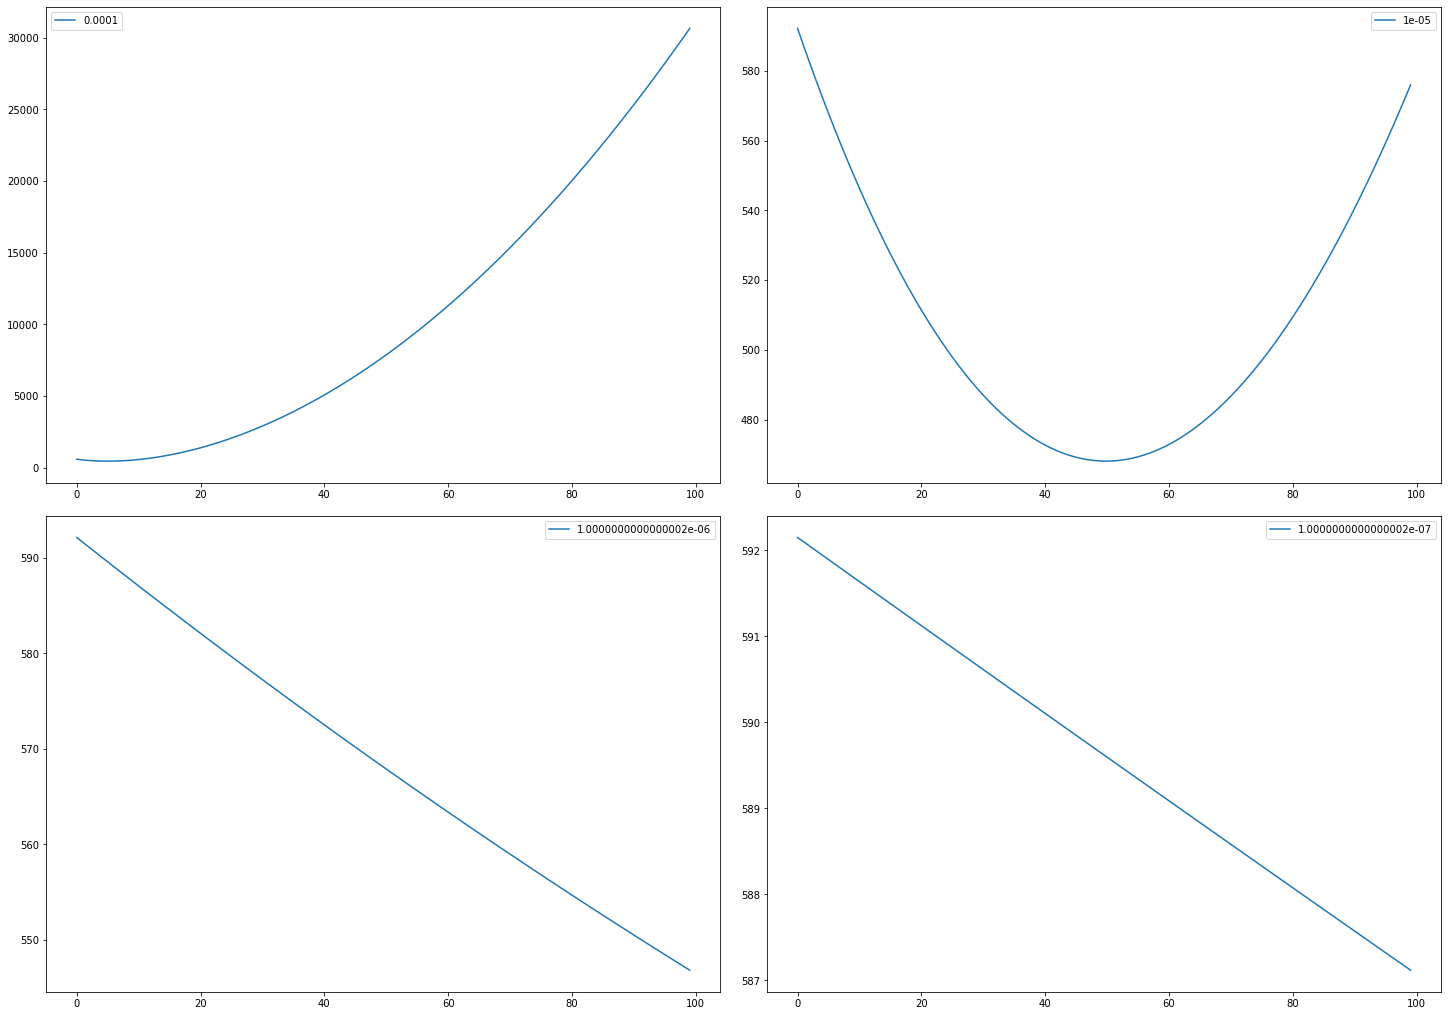

In [16]:
epoch = 100
alpha = 0.0001
#레이아웃이 안겹치게 해준다.
fig,axes = plt.subplots(2,2,figsize = (20,14),constrained_layout = True) 
python_res = []
theta_list = []
for row_ax in axes:
    for ax in row_ax:
        theta_ = np.zeros((m + 1,1))
        cost_ = gradient(theta_,X,y,learning_rate = alpha,epoch = epoch)
        python_res.append(cost_)
        theta_list.append(theta_)
        ax.plot(cost_,label=f'{alpha}')
        ax.legend()
        alpha /= 10

In [17]:
print(np.min(python_res))

464.44163558369866


### Scipy를 통해 구한 최저 비용 VS 순수 경사하강법
|implement style|cost|
|-------|----|
|Scipy|23.04|
|Python natural|452.92|
|difference|429.88|

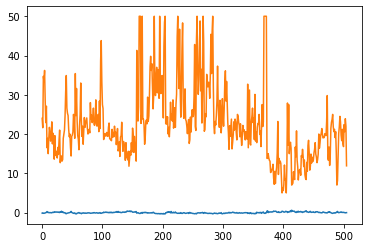

In [18]:
h_ = X.dot(theta_list[-1][1:]) + theta_list[-1][0]
plt.plot(h_)
plt.plot(y)


### 분산이 너무 크다!!
* 경사하강법을 사용해 적용하니 최소 MSE가 400이 넘었다.
* 이는 값들의 편차가 평균적으로 20 이상은 떨어져 있다는 의미가 된다.
* 이젠 어떻게 해야 할까..

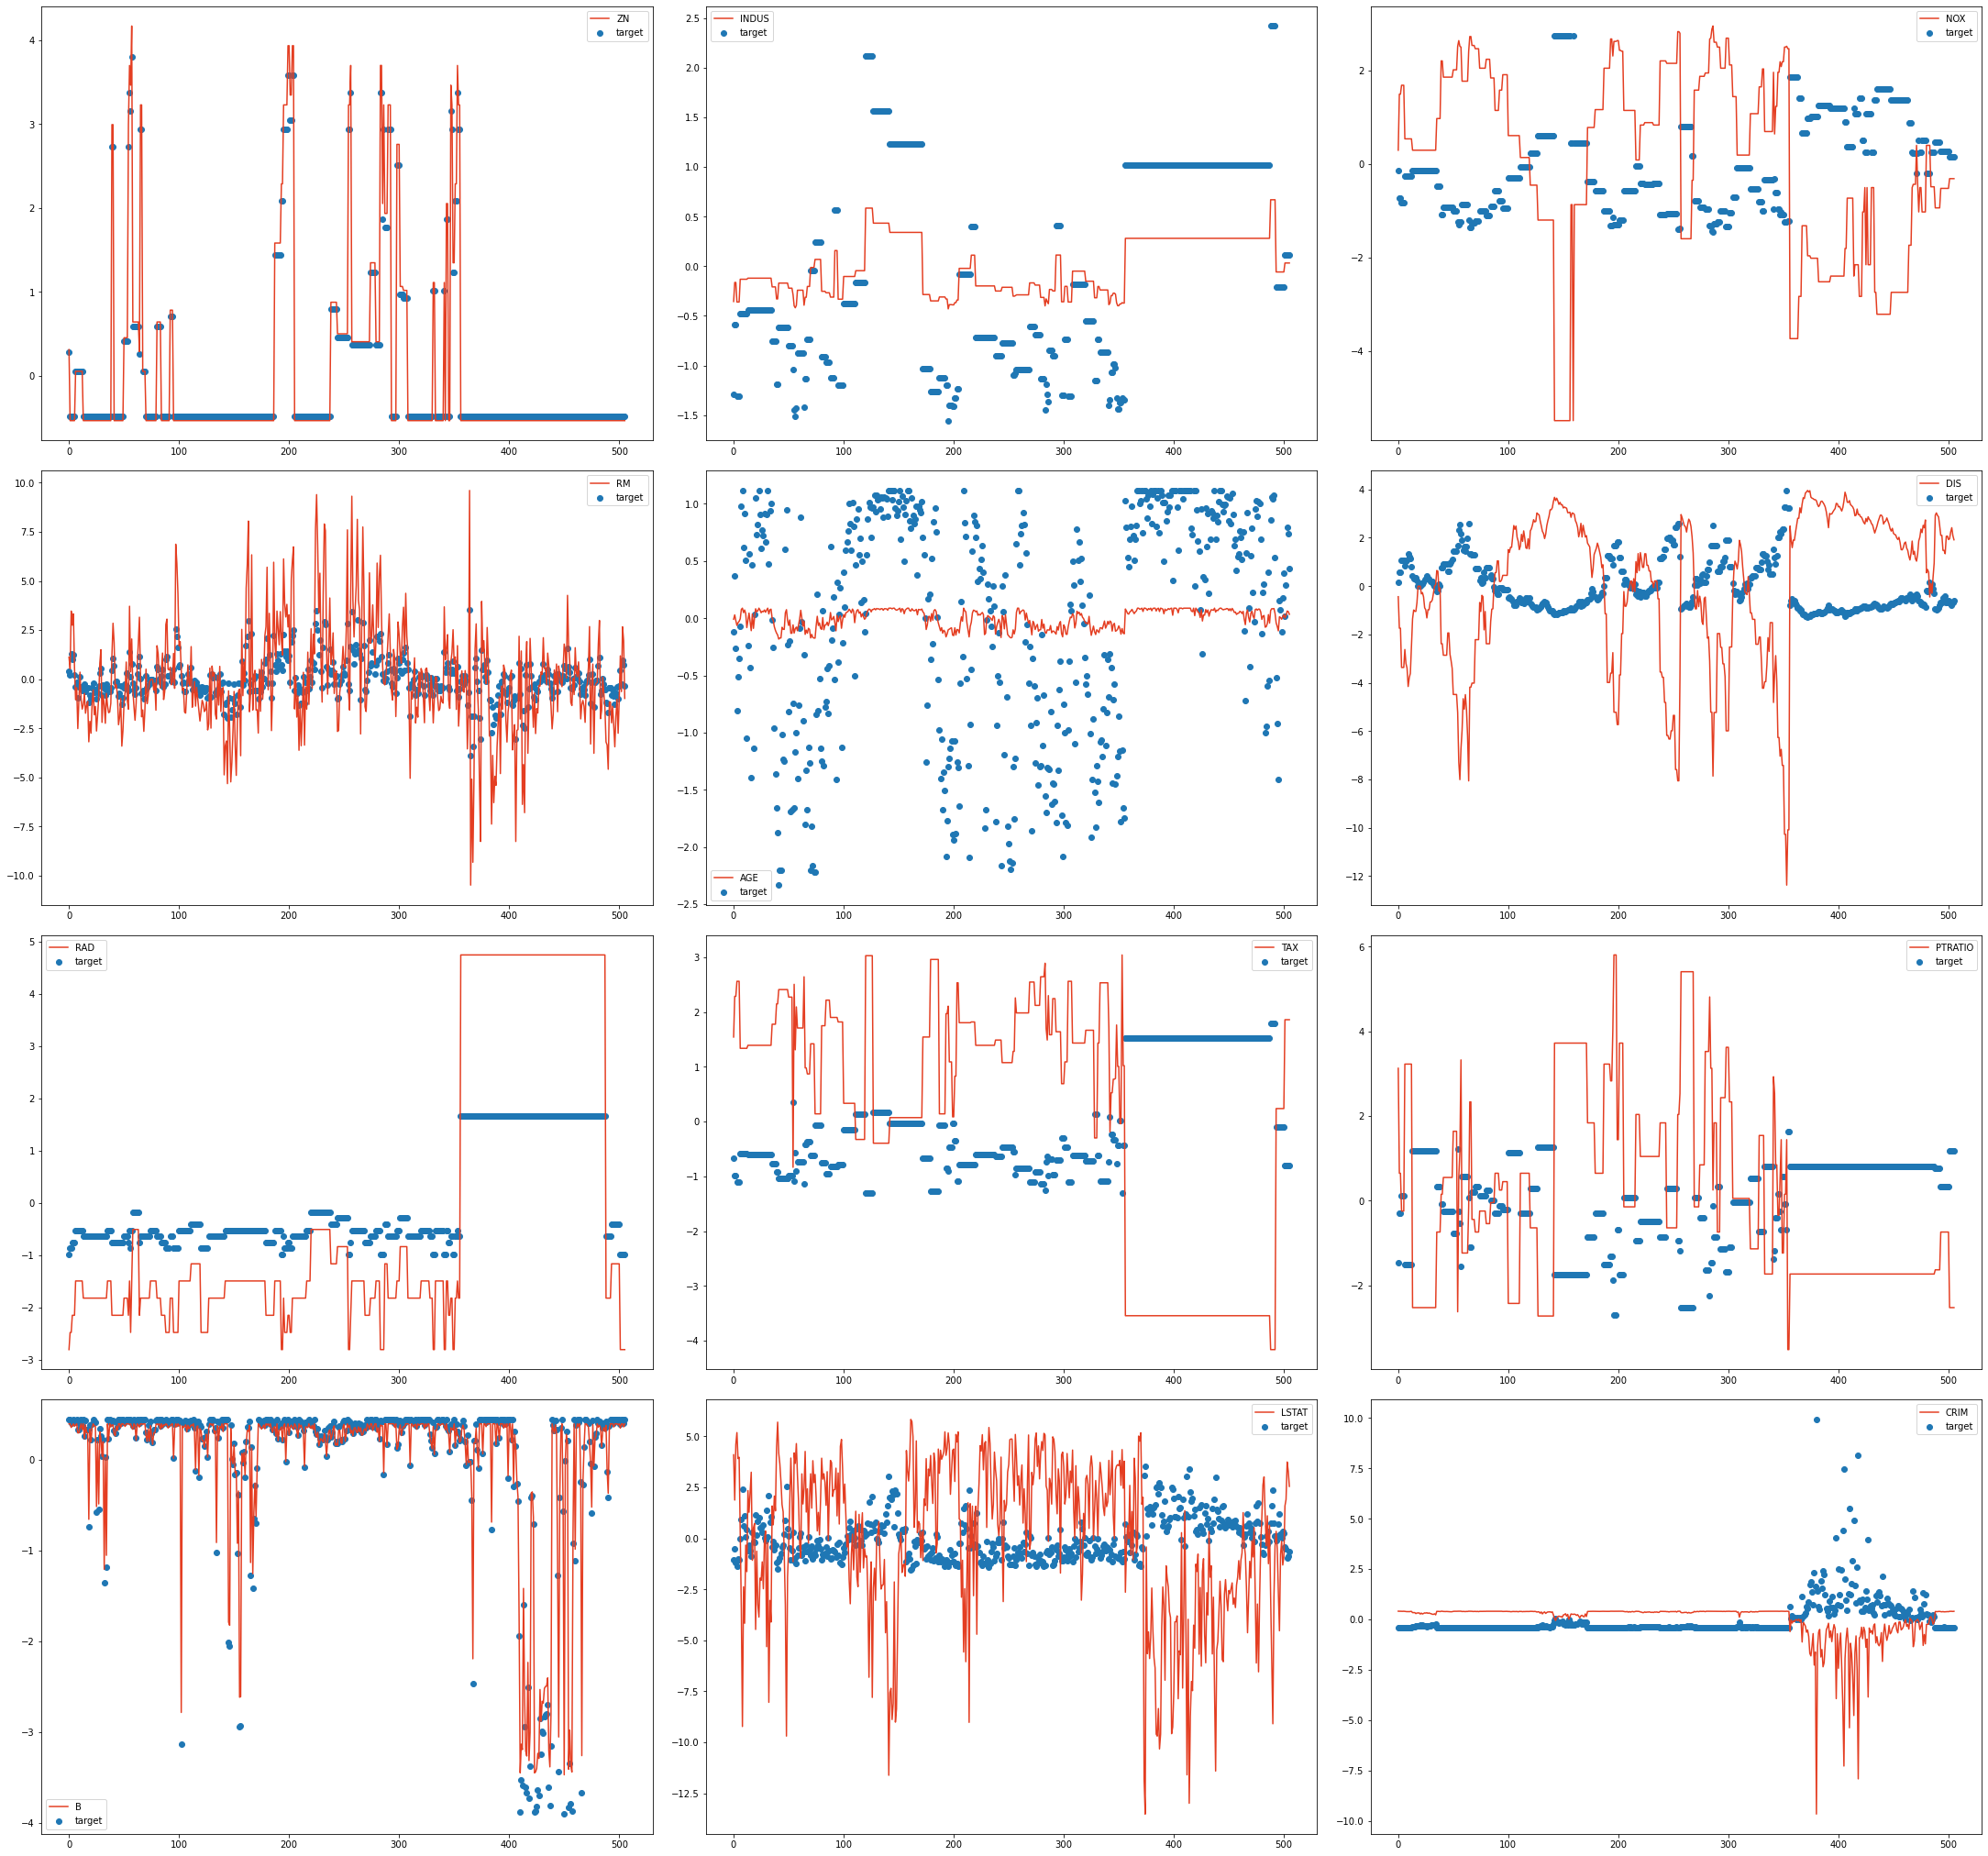

In [135]:
theta = res.x
fig,axes = plt.subplots(4,3,figsize = (30,28),constrained_layout = True)
# for row_ax in axes:
#     for ax in row_ax: #0번째는 절편이므로
#         col = numeric_boston.columns[index]
#         h_ = numeric_boston[col] * theta[index]
#         ax.plot(h_,label = col,color = '#E43E22')
#         ax.scatter(np.arange(X.shape[0]),numeric_boston[col])
#         ax.legend()
#         index += 1
for i,col in enumerate(numeric_boston):
    h_ = numeric_boston[col] * theta[i]
    row = (i - 1) // 3; col_ = (i - 1) % 3
    axes[row][col_].plot(h_,label = col,color = '#E43E22')
    axes[row][col_].scatter(np.arange(X.shape[0]),numeric_boston[col],label = 'target')
    axes[row][col_].legend()

In [136]:
theta

array([-0.97317614,  1.09737277,  0.27654529, -2.01244791,  2.70542368,
        0.07836669, -3.1277581 ,  2.85869928, -2.3183707 , -2.14537482,
        0.88934947, -3.81444739, 22.53280842])

In [19]:
for i,col in enumerate(numeric_boston):
    h_ = numeric_boston[col] * theta[i]
    row = (i - 1) // 3; col_ = (i - 1) % 3
    axes[row][col_].scatter(numeric_boston[col],y,label = 'target')
    axes[row][col_].plot(h_,label = col,color = '#E43E22')
    axes[row][col_].legend()

IndexError: index 2 is out of bounds for axis 0 with size 2